<a href="https://colab.research.google.com/github/Shilajit-CR7/ML-Works/blob/main/SVM(Image_Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras_preprocessing import image

# DataSet Preparation

In [ ]:
import os
from pathlib import Path

In [ ]:
p = Path('../../Documents/DAtaset/Images/')

In [1]:
# Taking the path of every images inside different folders
dirs = p.glob("*")
for folders in dirs:
    #print(folders)
    label = str(folders).split("\\")[-1]
    #print(label)
    for img_path in folders.glob('*.jpg'):
       # print(img_path)
        ## Error because big o/p so ran it in colab so error came of the path

SyntaxError: ignored

In [ ]:
#Every image is loaded and made that to an array
dirs = p.glob("*")

label_dic = {'cats':0,'dogs':1,'horses':2,'humans':3}
image_data = []
labels = []

for folders in dirs:
    #print(folders)
    label = str(folders).split("\\")[-1]
    #print(label)
    
   
    
    
    for img_path in folders.glob('*.jpg'):
        #print(img_path)
        img = image.load_img(img_path,target_size=(50,50))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dic[label])
        

In [ ]:
image_data[0] # All the images as matrix 

array([[[ 40.,  44.,  43.],
        [ 55.,  58.,  63.],
        [ 29.,  35.,  31.],
        ...,
        [ 86.,  93., 119.],
        [ 92.,  96., 107.],
        [199., 195., 166.]],

       [[ 41.,  45.,  44.],
        [ 49.,  52.,  57.],
        [ 45.,  51.,  47.],
        ...,
        [ 76.,  84., 105.],
        [ 71.,  77.,  89.],
        [216., 206., 181.]],

       [[ 41.,  45.,  44.],
        [ 37.,  40.,  45.],
        [ 41.,  47.,  43.],
        ...,
        [ 78.,  86., 105.],
        [ 78.,  88.,  89.],
        [206., 193., 159.]],

       ...,

       [[ 23.,  23.,  23.],
        [ 22.,  22.,  22.],
        [ 25.,  25.,  25.],
        ...,
        [ 47.,  36.,  32.],
        [ 71.,  56.,  49.],
        [ 87.,  72.,  67.]],

       [[ 20.,  20.,  20.],
        [ 22.,  22.,  22.],
        [ 21.,  21.,  21.],
        ...,
        [ 76.,  68.,  55.],
        [ 58.,  42.,  45.],
        [103.,  88.,  81.]],

       [[ 23.,  21.,  22.],
        [ 24.,  22.,  23.],
        [ 21.,  

In [ ]:
labels[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)

In [ ]:
def draw(img):
    plt.imshow(img)
    return

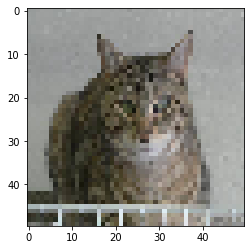

In [ ]:
draw(image_data[5])

# Randomly Shuffle the data

In [ ]:
import random

In [ ]:
combined = list(zip(image_data,labels)) ## Zipped
random.shuffle(combined) ## Shuffled 
image_data[:],labels[:] = zip(*combined)  ## Unzipped 

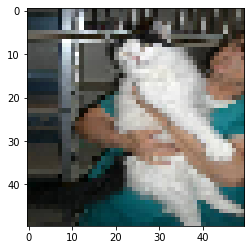

In [ ]:
draw(image_data[0])

In [ ]:
from sklearn import svm

In [ ]:
df = image_data.reshape(image_data.shape[0],-1)

In [ ]:
df.shape

(808, 7500)

In [ ]:
model = svm.SVC(kernel='poly',C=1)
model = model.fit(df,labels)
model.score(df,labels)

0.6472772277227723

In [ ]:
model.score(df,labels)

0.6658415841584159

In [ ]:
y_pred = model.predict(df)

In [ ]:
y_pred

array([0, 0, 2, 2, 3, 3, 0, 0, 1, 3, 0, 0, 3, 0, 0, 0, 2, 0, 3, 0, 3, 0,
       0, 0, 1, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 2, 2, 0, 2, 0, 1, 3, 3, 1, 2, 0, 3, 0, 0, 0, 0, 0, 2, 0, 1, 1,
       1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 3, 0,
       2, 0, 2, 2, 3, 3, 0, 3, 0, 0, 3, 0, 0, 3, 0, 3, 1, 0, 0, 0, 1, 3,
       1, 3, 1, 0, 0, 2, 2, 3, 0, 3, 0, 0, 1, 3, 0, 1, 2, 2, 2, 0, 0, 1,
       1, 0, 3, 0, 0, 3, 3, 0, 2, 0, 3, 0, 2, 3, 0, 1, 3, 2, 3, 2, 3, 0,
       0, 1, 0, 0, 0, 3, 2, 0, 1, 0, 0, 1, 3, 1, 0, 3, 0, 3, 1, 0, 2, 0,
       0, 2, 3, 3, 3, 1, 2, 2, 0, 2, 2, 3, 1, 0, 3, 1, 0, 1, 2, 1, 3, 2,
       1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 3, 1, 3, 3, 1,
       1, 0, 1, 1, 1, 0, 2, 0, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 2, 3,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 3, 2, 1, 1, 2, 0, 2, 2, 0,
       2, 3, 2, 1, 1, 3, 2, 0, 2, 1, 1, 3, 2, 1, 1, 2, 1, 1, 3, 2, 0, 1,
       1, 1, 1, 2, 3, 1, 1, 3, 3, 0, 3, 3, 2, 1, 2,

In [ ]:
type(df)

numpy.ndarray